In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/Roberto Rolo/Documents/GitHub/KML_hidreletricas/"

In [3]:
df = pd.read_csv(path+'relatorios/relatorio_81.csv', sep=';', encoding= 'unicode_escape')

In [4]:
filtro_tipo1 = df['Tipo de Intervenção'] == 'Canalização do curso d\'água'
filtro_tipo2 = df['Tipo de Intervenção'] == 'Cadastro apenas da barragem'
df = df[filtro_tipo1 | filtro_tipo2]

filtro_status1 = df['Status'] == 'Aguardando análise'
filtro_status2 = df['Status'] == 'Aguardando alterações de dados inconsistentes'
filtro_status3 = df['Status'] == 'Concedida'
filtro_status4 = df['Status'] == 'Indeferida'
filtro_status5 = df['Status'] == 'Em análise'
u_status = ['Concedida', 'Indeferida', 'Em análise', 'Aguardando alterações de dados inconsistentes', 'Aguardando análise']
df_filtrado = df[filtro_status1 |filtro_status2 | filtro_status3 | filtro_status4 | filtro_status5]

In [5]:
df_20 = pd.DataFrame()

In [6]:
for idx, row in df_filtrado.iterrows():
    if isinstance(row['Data de saída do processo'], str) and  row['Data de saída do processo'].split('/')[-1] == '2020':
        df_20 = df_20.append(row)

In [7]:
df_20.shape

(114, 54)

In [8]:
n_proc = df_20.shape[0]

In [9]:
n_proc

114

In [10]:
df_nomes = df_20[['Número do cadastro', 'Número da portaria', 'Nome do usuário de água', 'Status', 'Data de saída do processo', 'Município']]

df_nomes['Nome'] = 'N/D'
df_nomes['AHE'] = 'N/D'

nomes = pd.read_csv(path+"tabelas/nomes.csv", sep=",", encoding='utf8')

for index, row in nomes.iterrows():
    num = row['Número do cadastro']
    name = row['Nome']
    ahe = row['AHE']
    for index1, row1 in df_nomes.iterrows():
        num1 = row1['Número do cadastro']
        if num == num1:
            
            df_nomes.loc[index1, 'Nome'] = name
            df_nomes.loc[index1, 'AHE'] = ahe

df_nomes = df_nomes[['Número do cadastro', 'AHE', 'Nome', 'Nome do usuário de água', 'Município', 'Status', 'Data de saída do processo', 'Número da portaria']]

<ipython-input-10-c59c101f4b58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomes['Nome'] = 'N/D'
<ipython-input-10-c59c101f4b58>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nomes['AHE'] = 'N/D'
C:\Users\Roberto Rolo\anaconda3\envs\drh\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [11]:
df_nomes.shape

(114, 8)

In [12]:
nomes.shape

(127, 9)

In [13]:
df_filtrado = df_nomes

In [14]:
#plotando o mapa
pie_dict = {}
for s in u_status:
    ns = sum(df_filtrado['Status'] == s)
    if ns > 0:
        pie_dict[s] = ns
        
pie_dict_ahe = {}
for s in np.unique(df_filtrado['AHE']):
    ns = sum(df_filtrado['AHE'] == s)
    if ns > 0:
        pie_dict_ahe[s] = ns

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

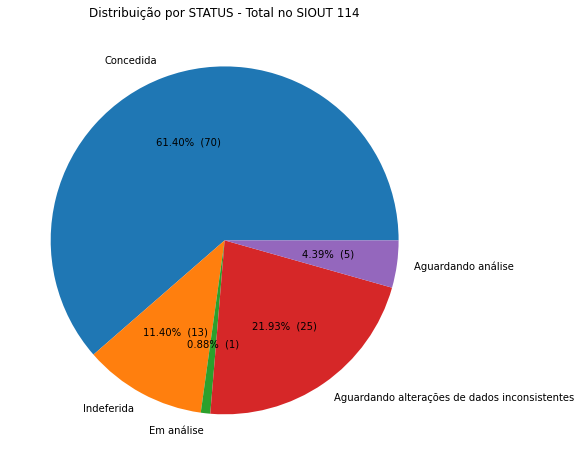

In [15]:
plt.figure(figsize=(8,8))
plt.pie(pie_dict.values(), autopct=make_autopct(pie_dict.values()), labels=pie_dict.keys())
plt.title('Distribuição por STATUS - Total no SIOUT {}'.format(n_proc))
plt.savefig('dist_status.png')
plt.show()

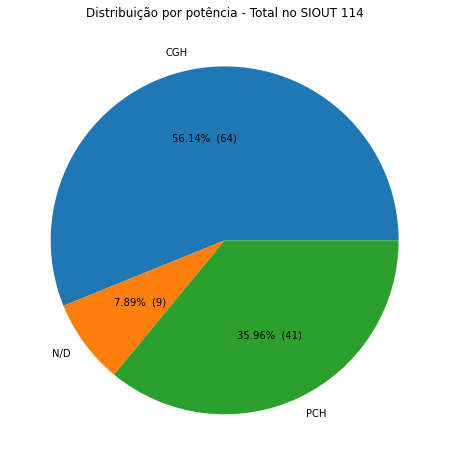

In [16]:
plt.figure(figsize=(8,8))
plt.pie(pie_dict_ahe.values(), autopct=make_autopct(pie_dict_ahe.values()), labels=pie_dict_ahe.keys())
plt.title('Distribuição por potência - Total no SIOUT {}'.format(n_proc))
plt.savefig('dist_pot.png', bbox_inches='tight', transparent=False)
plt.show()

In [17]:
from datetime import date

today = date.today()
ano = 2020
primeiro_dia = date(ano, 1, 1)

In [18]:
df = df_filtrado

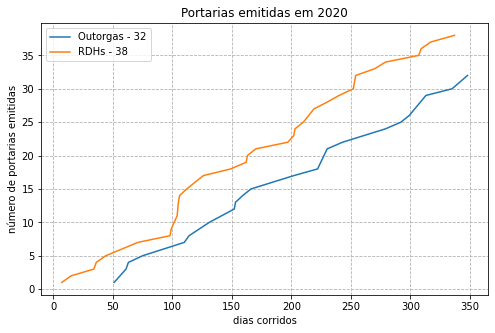

In [19]:
filtro_outorga = []
for idx, row in df[['Número da portaria', 'Data de saída do processo']].iterrows():
    if row['Número da portaria'].split('-')[0] == 'O' and row['Data de saída do processo'].split('/')[-1] == str(ano):
        filtro_outorga.append(True)
    else:
        filtro_outorga.append(False)
        
no = []
od = []

dias_unicos = np.unique(df[filtro_outorga]['Data de saída do processo'])
for d in dias_unicos:
    out_dia = np.sum(df[filtro_outorga]['Data de saída do processo'] == d)
    dia = date(int(d.split('/')[-1]), int(d.split('/')[-2]), int(d.split('/')[-3]))
    dias_corridos = dia - primeiro_dia
    no.append(out_dia)
    od.append(dias_corridos.days)

no = np.array(no)
od = np.array(od)

args = np.argsort(od)
no = no[args]
no = np.cumsum(no)
od = od[args]

filtro_rdh = []
for idx, row in df[['Número da portaria', 'Data de saída do processo']].iterrows():
    if row['Número da portaria'].split('-')[0] == 'R' and row['Data de saída do processo'].split('/')[-1] == str(ano):
        filtro_rdh.append(True)
    else:
        filtro_rdh.append(False)
        
nr = []
rd = []

dias_unicos = np.unique(df[filtro_rdh]['Data de saída do processo'])
for d in dias_unicos:
    rdh_dia = np.sum(df[filtro_rdh]['Data de saída do processo'] == d)
    dia = date(int(d.split('/')[-1]), int(d.split('/')[-2]), int(d.split('/')[-3]))
    dias_corridos = dia - primeiro_dia
    nr.append(rdh_dia)
    rd.append(dias_corridos.days)

nr = np.array(nr)
rd = np.array(rd)

args = np.argsort(rd)
nr = nr[args]
nr = np.cumsum(nr)
rd = rd[args]

plt.figure(figsize=(8,5))
plt.plot(od, no, label='Outorgas - {}'.format(no[-1]))
plt.plot(rd, nr, label='RDHs - {}'.format(nr[-1]))
plt.xlabel('dias corridos')
plt.ylabel('número de portarias emitidas')
plt.title('Portarias emitidas em 2020')
plt.legend()
plt.grid(ls='--')
plt.savefig('portarias_emitidas.png', bbox_inches='tight', transparent=False)
plt.show()